<a href="https://colab.research.google.com/github/kunalsir98/Deep_learning/blob/main/catvsdog_practical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!mkdir -p ~/ .kaggle

In [5]:
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
!chmod 600 /root/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [7]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:27<00:00, 42.0MB/s]
100% 1.06G/1.06G [00:27<00:00, 41.4MB/s]


In [8]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [9]:
!pip list


Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.5
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.7.0
anyio                            3.7.1
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array_record                     0.5.1
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.1.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.15.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bidict                           0.23.1

In [10]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [11]:
train_ds=keras.utils.image_dataset_from_directory(

    directory="/content/train",
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode='int'


)

validation_ds=keras.utils.image_dataset_from_directory(
    directory="/content/test",
    batch_size=32,
    image_size=(256,256),
    labels="inferred",
    label_mode='int'


)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [12]:
def process(image,label):
  tf.cast(image/255,tf.float32)
  return image,label


train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [13]:
model=Sequential()

In [14]:
#this is my first convulational layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
#this is my second convulational layer
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))
#this is my third convulational layer
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# convert the data into 1-d array
model.add(Flatten())

#1 hiiden layer
model.add(Dense(128,activation='relu'))

#hidden layer
model.add(Dense(64,activation='relu'))

#outputlayer
model.add(Dense(1,activation='sigmoid'))

In [15]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
model.fit(train_ds,epochs=2,validation_data=validation_ds)

Epoch 1/2
625/625 [==============================] - 70s 98ms/step - loss: 2.4661 - accuracy: 0.5441 - val_loss: 0.6861 - val_accuracy: 0.5352
Epoch 2/2
625/625 [==============================] - 53s 84ms/step - loss: 0.6755 - accuracy: 0.5753 - val_loss: 0.6782 - val_accuracy: 0.5716


In [19]:
import cv2
import matplotlib.pyplot as plt

In [71]:
dog_image=plt.imread(r"/content/train/dogs/dog.1.jpg")

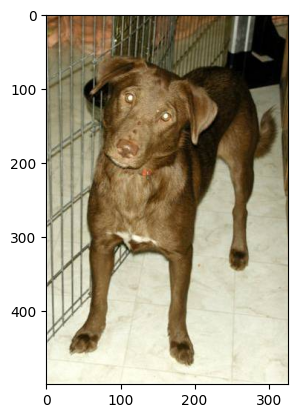

In [72]:
plt.imshow(dog_image)

In [73]:
cat_image=plt.imread(r'/content/test/cats/cat.10000.jpg')

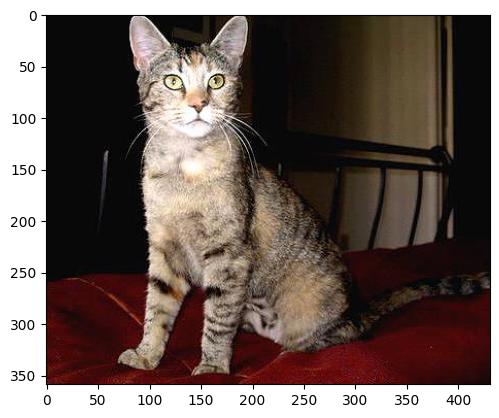

In [74]:

plt.imshow(cat_image)

In [75]:
dog_image.shape


(499, 327, 3)

In [76]:
cat_image.shape

(359, 431, 3)

In [77]:
import cv2
dog_resize=cv2.resize(dog_image,(256,256))
cat_resize=cv2.resize(cat_image,(256,256))

In [78]:
dog_resize.shape

(256, 256, 3)

In [79]:
cat_resize.shape

(256, 256, 3)

In [80]:
dog_resize=dog_resize.reshape((1,256,256,3))

In [81]:
cat_resize=cat_resize.reshape((1,256,256,3))

In [82]:

dog_resize.shape

(1, 256, 256, 3)

In [83]:
cat_resize.shape

(1, 256, 256, 3)

In [84]:

model.predict(dog_resize)

1/1 [==============================] - 0s 19ms/step


array([[0.4091934]], dtype=float32)

In [85]:

model.predict(cat_resize)

1/1 [==============================] - 0s 17ms/step


array([[0.37191668]], dtype=float32)